# PROJET TROTTINNETTES ELECTRIQUES

# Haoua Ben Ali Abbo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Valeurs numériques des paramètres du problème

N = 2
lamda = 0.1
t_trajet = 5
p_panne = 0.01
p_vide = 0.1
t_intervention = 30
t_recharge = 240
t_reparation = 720

# 1. Modélisation 

On modèle le problème par 4 colonies : 

C1 : trottinettes en attente d'utilisation et fonctionnelles \
C2 : trottinettes en utilisation \
C3 : trottinettes en recharge \
C4 : trottinettes en réparation 

On précise que "fonctionnelle" signifie que les trottinnettes ne sont ni déchargées, ni en panne (et a fortiori ni en cours de réparation, ni en cours de recharge).

Pour C3 et C4, on prend en compte les temps d'intervention des prestataires ou techniciens. Finalement, il s'agit plutôt d'une procédure entière qui aboutit soit à la rechage soit à la réparation des trottinettes.

L'espace d'états s'écrit alors : $E=\left\{n\in \mathbb{N^{4}} : \sum_{j=1}^{4}n_{j}=N \right\}$

Le processus de Markov est donc $X : \mathbb{R}_{+} \to E$ qui donne à chaque instant la répartition des N trottinettes à travers les 4 colonies.


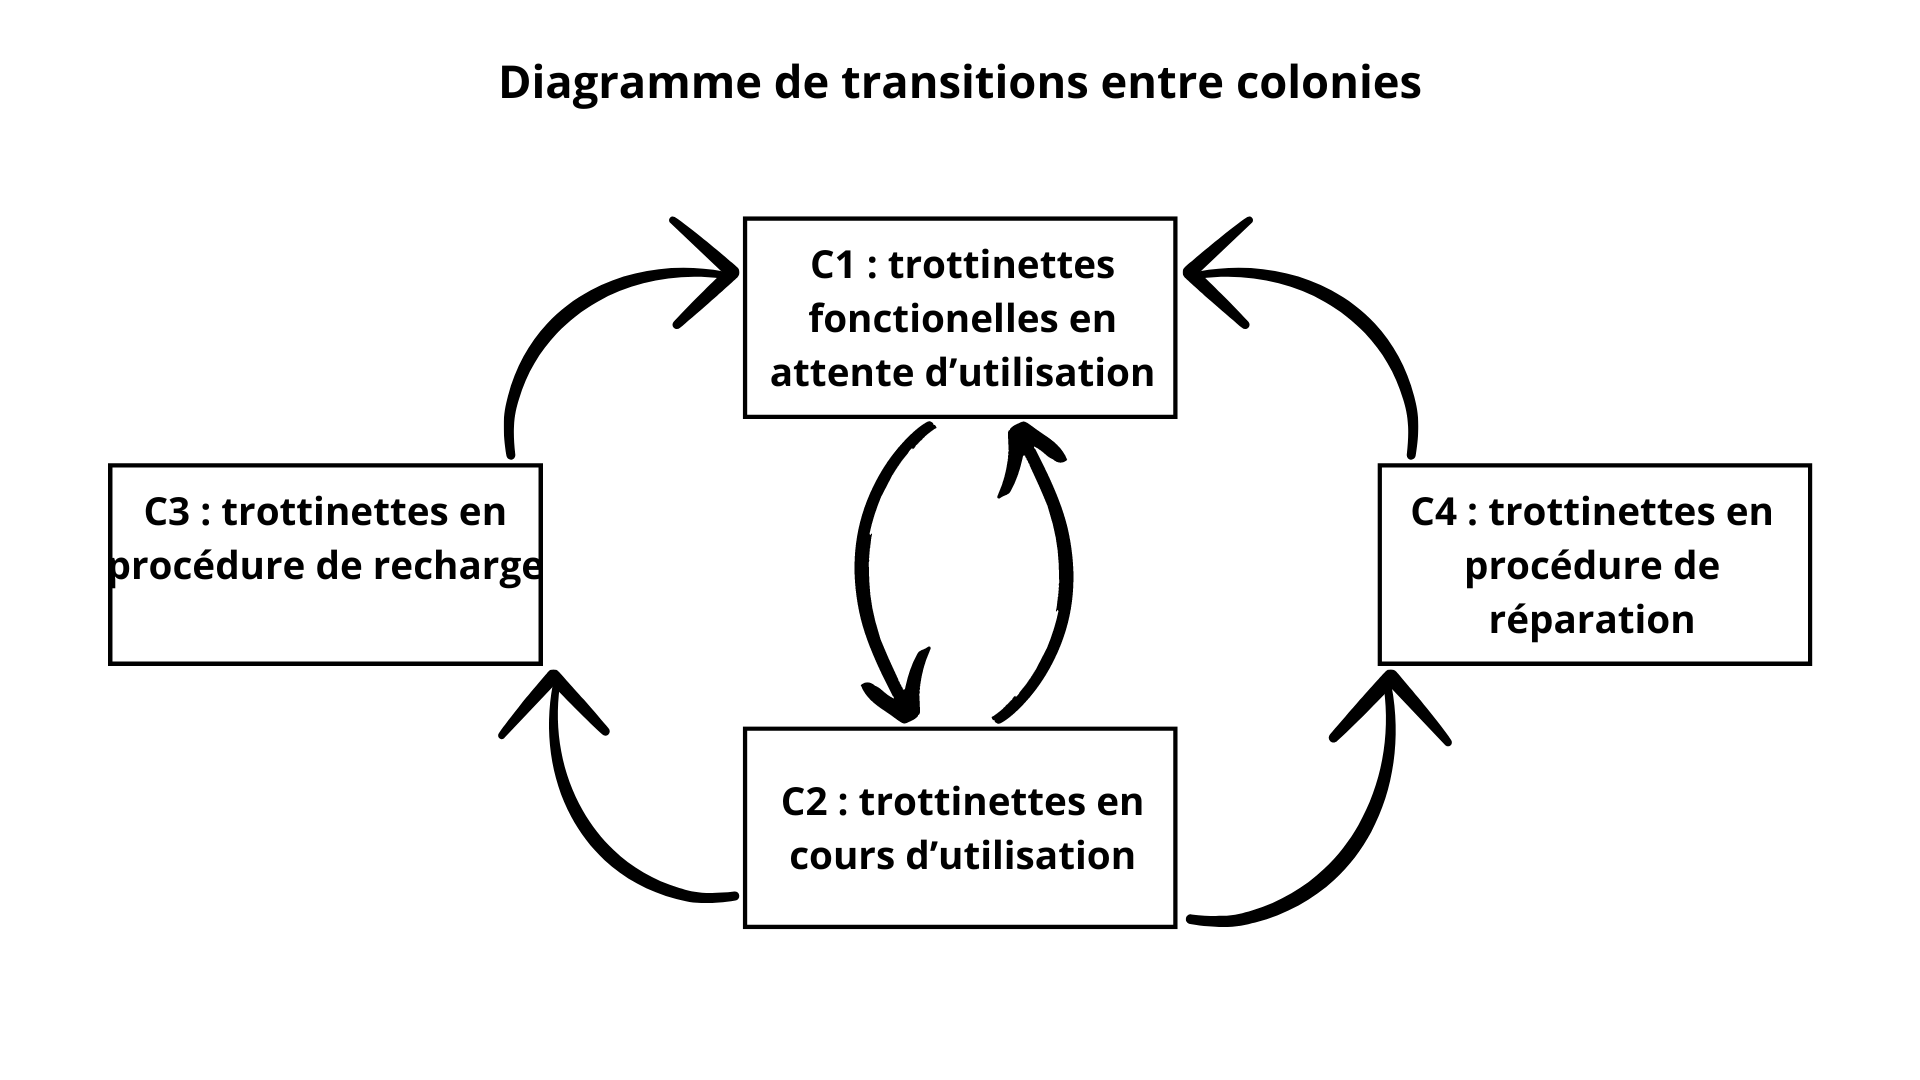

In [6]:
from IPython import display 
display.Image("/Users/haouabenaliabbo/Downloads/Diagramme de transitions entre colonies.png")



# 2. Calibrage

Les taux de transitions s'écrivent facilement selon la formule du cours

 $q(n,T_{j,k})=\phi _{j}(n_{j})\lambda _{j,k}$ 
 
 On a $\phi _{1}(n_{1}) = \mathbb{1}_{n_{1}>0}$.

 
 Ensuite, on remarque que pour toutes les transitions (sauf pour 1 vers 2) les actions s'effectuent en parallèle donc les $\phi _{j}(n_{j})$ se reduisent simplement à $\phi _{j}(n_{j})=n_{j}$.
 
 Enfin, on déduit les $\lambda _{j,k}$ selon notre modélisation des colonies :

$\lambda _{12}= \lambda$

$\lambda _{21}= (1-p_{vide}-p_{panne})\frac{1}{t_{trajet}}$

$\lambda _{23}= p_{vide}\frac{1}{t_{trajet}}$

$\lambda _{24}= p_{panne}\frac{1}{t_{trajet}}$

$\lambda _{31}= \frac{1}{(t_{intervention}+t_{recharge})}$

$\lambda _{41}= \frac{1}{(t_{intervention}+t_{reparation})}$

In [4]:
# Fonction de transition

def transition(n):
    n1, n2, n3, n4 = n
    if n1>0:
        q12 = lamda
    else:
        q12 = 0
    q21 = n2 * (1-p_panne-p_vide) * 1/t_trajet
    q23 = n2 * p_vide * 1/t_trajet
    q24 = n2 * p_panne * 1/t_trajet
    q31 = n3 * 1/(t_intervention + t_recharge)
    q41 = n4 * 1/(t_intervention + t_reparation)
    
    return q12, q21, q23, q24, q31, q41
    

# 3. Probabilité stationnaire 

La probailité stationnaire théorique s'obtient par la formule du cours :
$\pi(n)=\frac{1}{K} \prod_{j=1}^{J} \frac{\alpha_{j}^{n_{j}}}{\prod_{r=1}^{n_{j}} \phi_{j}(r)}, \quad n \in E, $ où K est la constante de normalisation

Il advient : $\pi(n)=\frac{1}{K}(\frac{\alpha^{n_{1}} _{1}}{1}\frac{\alpha^{n_{2}} _{2}}{n_{2}!}\frac{\alpha^{n_{3}} _{3}}{n_{3}!}\frac{\alpha^{n_{4}} _{4}}{n_{4}!})$

Les $\alpha_{j}$ s'obtiennent à partir de l'équation de traffic, à un facteur multiplicatif près :

$ \forall j\in \left\{ 1,2,3,4\right\}, \alpha _{j}\sum_{k=1, k\neq j}^{4}\lambda_{j,k}= \sum_{k=1, k\neq j}^{4}\alpha _{k}\lambda_{k,j}$ 

Le système s'écrit alors : 
$\left\{\begin{matrix}
\alpha _{1}\lambda _{12}=\alpha _{2}\lambda _{21}+\alpha _{3}\lambda _{31}+\alpha _{4}\lambda _{41} \\
 \alpha _{2}(\lambda _{21}+\lambda _{23}+\lambda _{24})=\alpha _{1}\lambda _{12}\\
 \alpha _{3}\lambda _{31}=\alpha _{2}\lambda _{23}\\
\alpha _{4}\lambda _{41}=\alpha _{2}\lambda _{24}
\end{matrix}\right.$

Après calcul, on trouve les relations suivantes (on prend la constante de proportionalité égale à 1 pour simplifier):

$\left\{\begin{matrix}
\alpha _{1}=\lambda t_{trajet} \\
 \alpha _{2}=\frac{1}{\lambda t_{trajet}}\\
\alpha _{3}=\frac{p_{vide}(t_{intervention} + t_{recharge})}{t_{trajet}} \\
\alpha _{4}=\frac{p_{panne}(t_{intervention} + t_{reparation})}{t_{trajet}} 
\end{matrix}\right.$


In [5]:
def pi(n):
    n1, n2, n3, n4 = n
    alpha1, alpha2, alpha3, alpha4 = alpha
    numerator = (alpha1 ** n1) * (alpha2 ** n2) / np.math.factorial(n2) * (alpha3 ** n3) / np.math.factorial(n3) * (alpha4 ** n4) / np.math.factorial(n4)
    M = sum(n)
    k = 0
    for i1 in range(M,-1,-1):
        for i2 in range(M-i1+1,-1,-1):
            for i3 in range(M-i1-i2,-1,-1):
                i4 = M-i1-i2-i3
                k += (alpha1 ** i1) * (alpha2 ** i2) / np.math.factorial(i2) * (alpha3 ** i3) / np.math.factorial(i3) * (alpha4 ** i4) / np.math.factorial(i4)
    return numerator / k if k != 0 else 0

# Test de la fonction avec des paramètres donnés
alpha1 = lamda * t_trajet
alpha2 = 1 / (lamda * t_trajet)
alpha3 = p_vide * (t_intervention + t_recharge) / t_trajet
alpha4 = p_panne * (t_intervention + t_reparation) / t_trajet

alpha = [alpha1, alpha2, alpha3, alpha4]


# 4. Simulation

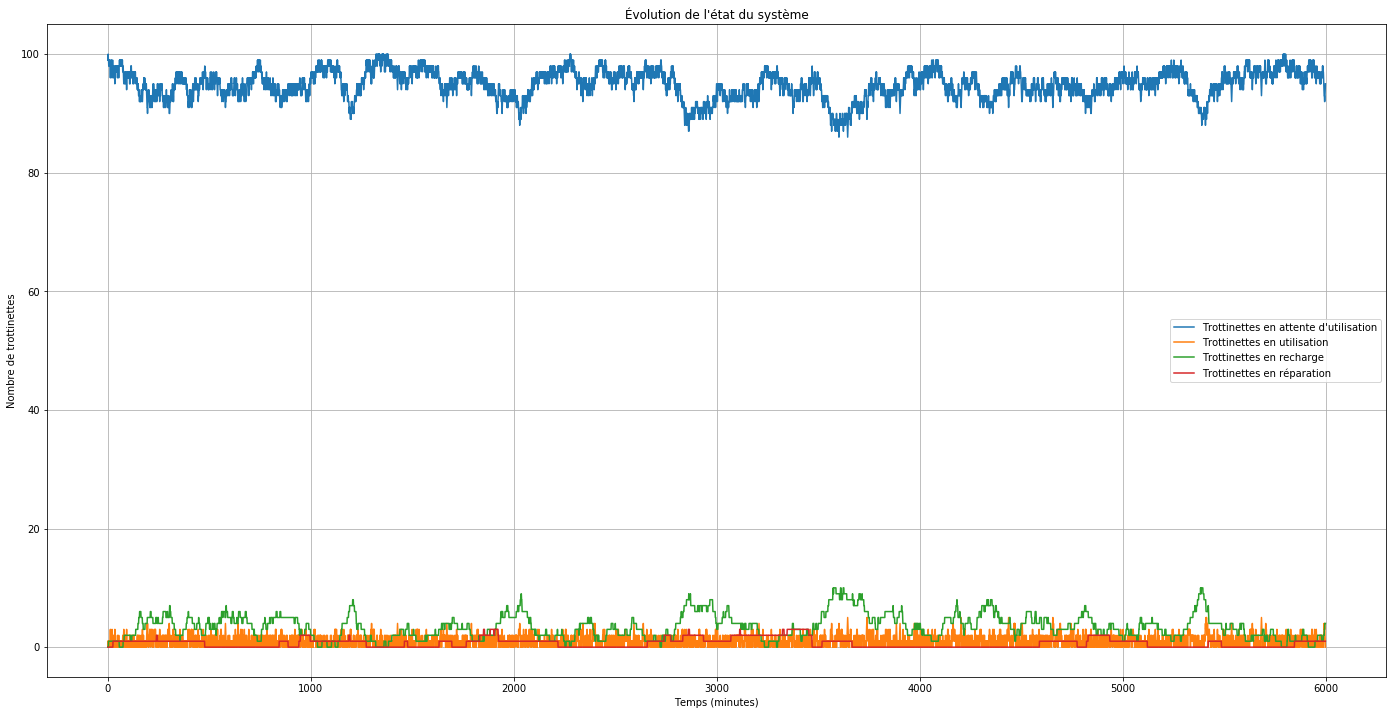

In [6]:
# Initialisation de l'état du système
etat_initial = [100, 0, 0, 0]  # [C1, C2, C3, C4]


# Temps total de simulation
temps_simulation = 100 * 60  # 100 heures converties en minutes


def simulation(temps_simulation,etat_initial):
    n=etat_initial

    # Liste pour enregistrer l'état du système au fil du temps
    etat_systeme = []

    # Simulation
    temps = 0
    while temps < temps_simulation:
        # Calcul des taux de transitions
        q12, q21, q23, q24, q31, q41 = transition(n)
        
        # Calcul du taux de transition total
        q_total = q12 + q21 + q23 + q24 + q31 + q41
        
        # Sélection de la transition
        transitions = [q12, q21, q23, q24, q31, q41]
        transition_index = np.random.choice(range(len(transitions)), p=[q/q_total for q in transitions])
        
        # Mise à jour de l'état du système
        if transition_index == 0:
            n[0] -= 1
            n[1] += 1
        elif transition_index == 1:
            n[1] -= 1
            n[0] += 1
        elif transition_index == 2:
            n[1] -= 1
            n[2] += 1
        elif transition_index == 3:
            n[1] -= 1
            n[3] += 1
        elif transition_index == 4:
            n[2] -= 1
            n[1] += 1
        elif transition_index == 5:
            n[3] -= 1
            n[0] += 1
        
        # Enregistrement de l'état du système
        etat_systeme.append(n.copy())
        
        # Mise à jour du temps de simulation
        temps += 1

    # Convertir l'état du système en tableau numpy
    etat_systeme_array = np.array(etat_systeme)
    return etat_systeme,etat_systeme_array

#compute the mean of etat_systeme[i] for i in range(4)
#mean = np.mean(etat_systeme, axis=0)
#print(etat_systeme)

etat_systeme100,etat_systeme_array100 = simulation(temps_simulation,[100,0,0,0])

# Visualisation de l'évolution de l'état du système
plt.figure(figsize=(24, 12))
plt.plot(etat_systeme_array100[:, 0], label='Trottinettes en attente d\'utilisation')
plt.plot(etat_systeme_array100[:, 1], label='Trottinettes en utilisation')
plt.plot(etat_systeme_array100[:, 2], label='Trottinettes en recharge')
plt.plot(etat_systeme_array100[:, 3], label='Trottinettes en réparation')
plt.xlabel('Temps (minutes)')
plt.ylabel('Nombre de trottinettes')
plt.title('Évolution de l\'état du système')
plt.legend()
plt.grid(True)
plt.show()


On observe qu'en partant d'une configuartion initiale où toutes les trottinettes sont en attentes d'utilisation, la répartition des trottinettes dans les différentes colonies fluctue peu : il y a une majorité qui reste en attente d'utilisation. parmis les autres colonies, on retrouve plus souvent des trottinettes en recharge qu'en utilisation, ce qui est cohérent avec les durées de recharge (très longues par rapport au durées d'utilisation moyennes). Enfin, les trottinettes tombent rarement en panne.

# 5. Validation 

Une première approche consiste en le calcul sur une période de temps suffisamment longue de la fréquence à laquelle chaque état est visité grâce à la simulation. Ensuite, nous normaliserons ces fréquences pour obtenir une estimation de la probabilité stationnaire. On s'appuie en effet sur une version de la loi forte des grands nombres pour les chaines de Markov qui stipule que $\pi(n)=\displaystyle \lim_{m \to inf}\frac{S_{m}(n)}{m}$ où  $\frac{S_{m}(n)}{m}$ correspond à la fraction de temps passé en l'état n pendant les m premiers pas de la chaîne de Markov. 


Si on se limite à 2 trottinettes, l'espace d'état se réduit à 10 possibilités, qu'on peut dénombrer. Il suffit ensuite de compter les occurrences des états (c'est-à-dire les états du système obtenus à partir de la simulaton) pour chaque combinaisons possibles. Puis on divise le nombre total d'occurence par le temps de simulation total pour trouver une valeur approchée de la probabilité stationnaire, pour un temps suffisamment long. 

Une deuxième approche consiste en une méthode de Monte Carlo pour estimer la probabilité stationnaire. En effet, dans le cours de MACS205, on a étudié l'algorithme de Metropolis-Hastings dans le cadre des "Markov Chains Monte Carlo". L'algorithme est utilisé pour simuler des échantillons à partir d'une distribution de probabilité cible, souvent difficile à échantillonner directement. Son principe est de construire une chaîne de Markov dont la distribution stationnaire est la distribution cible que l'on souhaite échantillonner. Ici, nous disposons déjà d'une trajectoire simulée de notre processus de Markov (c'est-à-dire une séquence d'états successifs générés par la chaîne, stockés dans etats_systeme). Dans ce cas, on peut estimer la probabilité stationnaire à partir de cette trajectoire en comptant simplement le nombre de fois où chaque état apparaît dans la trajectoire.

Voici alors le pseudo-code que nous utiliserons :

Initialisation :
    Trajectoire simulée de la chaîne de Markov : etat_systeme
    Initialiser un dictionnaire state_counts pour compter les occurrences de chaque état
    Initialiser le nombre total d'états total_states dans etat_systeme
    Initialiser un dictionnaire stationary_distribution pour stocker la probabilité stationnaire estimée

Pour chaque état dans etat_systeme :
    Si l'état est déjà présent dans state_counts :
        Incrémenter son compteur dans state_counts
    Sinon :
        Ajouter l'état à state_counts avec un compteur initialisé à 1

Pour chaque état dans state_counts :
    Calculer la probabilité stationnaire en divisant le nombre d'occurrences de l'état par total_states
    Stocker la probabilité stationnaire dans stationary_distribution avec l'état comme clé

Retourner stationary_distribution


In [22]:
"""Première approche naive"""

from itertools import product

etat_systeme=simulation(temps_simulation,[2,0,0,0])[0]

# Générer toutes les combinaisons possibles de 4-uplets avec une somme de 2
combinations = [(a, b, c, 2 - a - b - c) for a, b, c in product([0, 1, 2], repeat=3) if a + b + c <= 2]
occurrences = {tuple(comb): 0 for comb in combinations}

for etat in etat_systeme:
    if sum(etat) == 2:
        uplet_tuple = tuple(etat)
        if uplet_tuple in occurrences:
            occurrences[uplet_tuple] += 1


for comb in combinations:
    print(f"probabilité stationnaire théorique de l'état {comb} = {pi(comb):.2f}")

print("\n")

for comb, count in occurrences.items():
    proba = count / len(etat_systeme)
    print(f"probabilité stationnaire simulée de l'état {comb}= {proba:.2f}")




probabilité stationnaire théorique de l'état (0, 0, 0, 2) = 0.03
probabilité stationnaire théorique de l'état (0, 0, 1, 1) = 0.18
probabilité stationnaire théorique de l'état (0, 0, 2, 0) = 0.33
probabilité stationnaire théorique de l'état (0, 1, 0, 1) = 0.07
probabilité stationnaire théorique de l'état (0, 1, 1, 0) = 0.24
probabilité stationnaire théorique de l'état (0, 2, 0, 0) = 0.05
probabilité stationnaire théorique de l'état (1, 0, 0, 1) = 0.02
probabilité stationnaire théorique de l'état (1, 0, 1, 0) = 0.06
probabilité stationnaire théorique de l'état (1, 1, 0, 0) = 0.02
probabilité stationnaire théorique de l'état (2, 0, 0, 0) = 0.01


probabilité stationnaire simulée de l'état (0, 0, 0, 2)= 0.00
probabilité stationnaire simulée de l'état (0, 0, 1, 1)= 0.01
probabilité stationnaire simulée de l'état (0, 0, 2, 0)= 0.03
probabilité stationnaire simulée de l'état (0, 1, 0, 1)= 0.07
probabilité stationnaire simulée de l'état (0, 1, 1, 0)= 0.30
probabilité stationnaire simulée de l'

On observe que les probabilités stationnaires théoriques et obtenues grace à la simulation ne concordent pas du tout avec la première approche! 

In [36]:
"""Deuxieme approche : MCMC avec Metropolis-Hastings"""

import random

def metropolis_hastings(etat_systeme, combinations, n_iter=1000):

    # Initialisation des probabilités stationnaires
    pi_estime = {comb: 0 for comb in combinations}

    # Initialisation de l'état
    etat = random.choice(etat_systeme)
    #print(etat)

    # Initialisation du compteur de visites
    visites = {comb: 0 for comb in combinations}
    #print(visites)

    # Initialisation de la probabilité stationnaire de l'état initial
    visites[tuple(etat)] += 1
    #print(visites)

    # Algorithme de Metropolis-Hastings
    for i in range(n_iter):
        # Sélection d'un état voisin
        etat_voisin = random.choice(etat_systeme)

        # Calcul de la probabilité d'acceptation
        proba_acceptation = min(1, pi(etat_voisin) / pi(etat))

        # Acceptation de l'état voisin
        if np.random.rand() < proba_acceptation:
            etat = etat_voisin

        # Mise à jour des visites
        visites[tuple(etat)] += 1

    # Estimation de la probabilité stationnaire
    for comb in combinations:
        pi_estime[comb] = visites[comb] / n_iter

    return pi_estime

# Estimation de la probabilité stationnaire
pi_estime = metropolis_hastings(etat_systeme, combinations, n_iter=10000)

# Affichage des résultats

for comb in combinations:
    print(f"probabilité stationnaire théorique de l'état {comb} = {pi(comb):.2f}")

print("\n")

for comb in combinations:
    print(f"probabilité stationnaire estimée par MCMC de l'état {comb} = {pi_estime[comb]:.2f}")


probabilité stationnaire théorique de l'état (0, 0, 0, 2) = 0.03
probabilité stationnaire théorique de l'état (0, 0, 1, 1) = 0.18
probabilité stationnaire théorique de l'état (0, 0, 2, 0) = 0.33
probabilité stationnaire théorique de l'état (0, 1, 0, 1) = 0.07
probabilité stationnaire théorique de l'état (0, 1, 1, 0) = 0.24
probabilité stationnaire théorique de l'état (0, 2, 0, 0) = 0.05
probabilité stationnaire théorique de l'état (1, 0, 0, 1) = 0.02
probabilité stationnaire théorique de l'état (1, 0, 1, 0) = 0.06
probabilité stationnaire théorique de l'état (1, 1, 0, 0) = 0.02
probabilité stationnaire théorique de l'état (2, 0, 0, 0) = 0.01


probabilité stationnaire estimée par MCMC de l'état (0, 0, 0, 2) = 0.00
probabilité stationnaire estimée par MCMC de l'état (0, 0, 1, 1) = 0.02
probabilité stationnaire estimée par MCMC de l'état (0, 0, 2, 0) = 0.10
probabilité stationnaire estimée par MCMC de l'état (0, 1, 0, 1) = 0.04
probabilité stationnaire estimée par MCMC de l'état (0, 1, 1

On observe que les probabilités stationnaires théoriques et estimées par MCMC sont beaucoup plus concordantes! Cependant, il faudrait des intervalles de confiances beaucoup trop large pour que les valeurs theoriques se retrouvent dedans.

# 6&7. Pour aller plus loin

Si on considère que le nombre de techniciens $n_{t}$ et de prestataires $n_{p}$ est fini, il faudra changer les taux de transitions pour 3 vers 1 et 4 vers 1. Précisement, $\phi _{3}(n_{3}) = n_{3}\mathbb{1}_{n_{p}>0}$ et $\phi _{4}(n_{4}) = n_{4}\mathbb{1}_{n_{t}>0}$.


Si on considère qu’une trottinette pouvait devenir irréparable avec une probabilité $p_{i}$, le modèle de migration n'est plus fermé. Pour cela, on se réfère au livre "Lecture Notes on Stochastic Networks" par Frank Kelly et Elena Yudovina, en particulier le chapitre 2.4 "Open migration processes".  On y apprend notamment qu'il suffit de considérer en plus des transitions précédentes, les transitions correpondnats aux sorties à partir de la colonie 4. On obtient aussi une nouvelle équation de traffic.

In [ ]:
# Fonction de transition modifiée

def transition2(n,n_t,n_p):
    n1, n2, n3, n4 = n
    if n1>0:
        q12 = lamda
    else:
        q12 = 0
    q21 = n2 * (1-p_panne-p_vide) * 1/t_trajet
    q23 = n2 * p_vide * 1/t_trajet
    q24 = n2 * p_panne * 1/t_trajet
    if n_p>0:
        q31 = n3 * 1/(t_intervention + t_recharge)
    else:
        q31 = 0
    if n_t>0:
        q41 = n4 * 1/(t_intervention + t_reparation)
    else:
        q41 = 0
    
    return q12, q21, q23, q24, q31, q41
    